In [66]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
number_of_files = 40

data = []
data_T = [[], [], [], [], [], [], []]

for i in range(6, number_of_files+1):
    data.append([])
    t = []
    A0 = []
    A1 = []
    A2 = []
    A3 = []
    open_file = open(f"C:/Users/Michiel Erkamp/Desktop/Bachelor-project/data experiment 1/data-{i}.csv", 'r')
    for line in open_file:
        data_opgeknipt = line.split(',')
        try:
            data_opgeknipt = line.split(',')
            t.append(float(data_opgeknipt[0]))
            A0.append(float(data_opgeknipt[1]))
            A1.append(float(data_opgeknipt[2])) 
            A2.append(float(data_opgeknipt[3]))
            A3.append(float(data_opgeknipt[4]))
        except:
            if data_opgeknipt[0] == "height of setup:":
                height = round(float(data_opgeknipt[1]) - 60.05, 2)
    open_file.close()

    A_avg = np.mean(np.array([A0, A1, A2, A3]), axis=0)

    data[i-6].append([height] * len(t))
    data[i-6].append(t)
    data[i-6].append(A0)
    data[i-6].append(A1)
    data[i-6].append(A2)
    data[i-6].append(A3)
    data[i-6].append(A_avg)

    data_T[0].append([height] * len(t))
    data_T[1].append(t)
    data_T[2].append(A0)
    data_T[3].append(A1)
    data_T[4].append(A2)
    data_T[5].append(A3)
    data_T[6].append(A_avg)


data_all = [[], [], [], [], [], [], []]
for i in range(len(data_all)):
    for row in data_T[i]:
        data_all[i].extend(row)

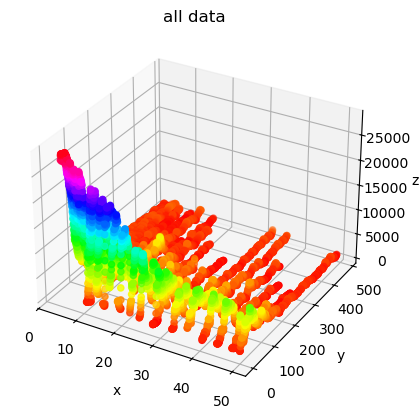

<Figure size 640x480 with 0 Axes>

In [68]:
x = data_all[0]
y = data_all[1]
z = data_all[6]

ax = plt.axes(projection='3d')
ax.set_title('all data')
# ax.plot_trisurf(x,y,z, cmap='hsv')
ax.scatter3D(x,y,z, '.', c=z, cmap='hsv') # viridis
ax.set_xlabel(r'x')
ax.set_ylabel(r'y')
ax.set_zlabel(r'z')
plt.show()
plt.clf()

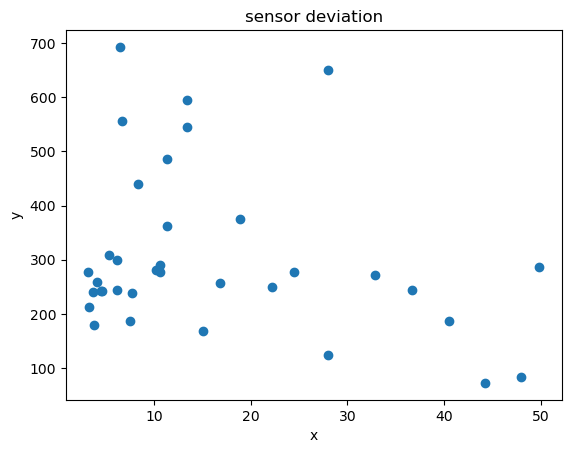

<Figure size 640x480 with 0 Axes>

In [69]:
x = []
y = []
sensor_baselines = []
sensor_deviations1 = []

for i in range(len(data)):
    data_i = np.array(data[i])
    A_all = data_i[2:6]
    sensor_avg = np.mean(A_all, axis=1)
    sensor_baseline = np.mean(A_all[:,-60:], axis=1)
    sensor_baselines.append(sensor_baseline)
    sensor_deviation = np.std(sensor_baseline)
    sensor_deviations1.append(sensor_deviation)

    x.append(data_i[0,0])
    y.append(sensor_deviation)


plt.scatter(x, y)
plt.title("sensor deviation")
# plt.xlim(0,55)
# plt.ylim(bottom=0)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.clf()

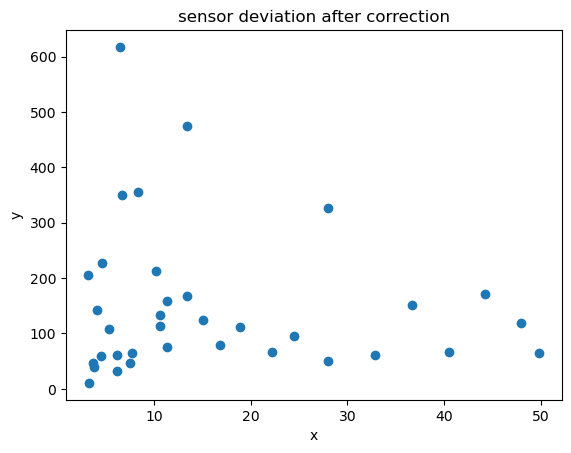

<Figure size 640x480 with 0 Axes>

In [70]:
sensor_baseline_avg = np.mean(sensor_baselines, axis=0)

factor = np.mean(sensor_baseline_avg)

x = []
y = []
sensor_deviations2 = []

for i in range(len(data)):
    data_i = np.array(data[i])
    A_all = data_i[2:6]
    corrected_A = []
    for j in range(len(sensor_baseline_avg)):
        corrected_A.append(np.array(A_all[j]) / sensor_baseline_avg[j])
    corrected_A = np.array(corrected_A)
    sensor_avg = np.mean(corrected_A, axis=1)
    sensor_baseline = np.mean(corrected_A[:,-60:], axis=1)
    sensor_deviation = np.std(sensor_baseline) * factor
    sensor_deviations2.append(sensor_deviation)

    x.append(data_i[0,0])
    y.append(sensor_deviation)
    # x.append([data_i[0,0],data_i[0,0],data_i[0,0],data_i[0,0]])
    # y.append(sensor_baseline)

plt.scatter(x, y)
plt.title("sensor deviation after correction")
# plt.xlim(0,55)
# plt.ylim(bottom=0)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.clf()

In [71]:
print(np.mean(sensor_deviations1))
print(np.mean(sensor_deviations2))

305.86076505205637
148.4346506832295


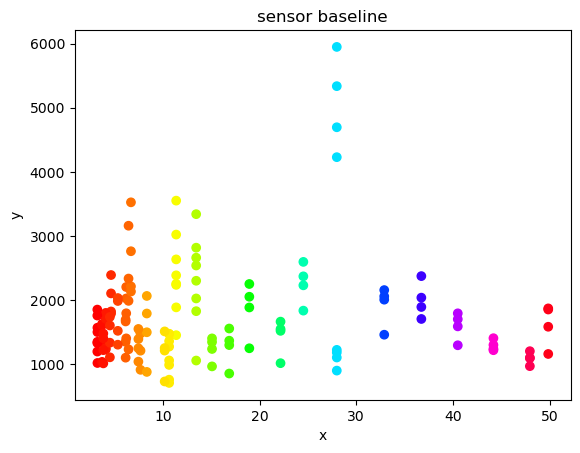

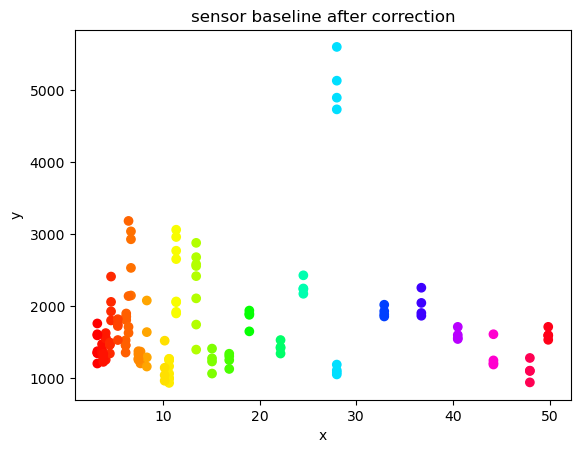

<Figure size 640x480 with 0 Axes>

In [72]:
x = []
y = []

for i in range(len(data)):
    data_i = np.array(data[i])
    A_all = data_i[2:6]
    corrected_A = []
    for j in range(len(sensor_baseline_avg)):
        corrected_A.append(np.array(A_all[j]) / sensor_baseline_avg[j] * factor)
    corrected_A = np.array(corrected_A)
    sensor_avg = np.mean(corrected_A, axis=1)
    sensor_baseline = np.mean(A_all[:,-60:], axis=1)
    sensor_baseline_corr = np.mean(corrected_A[:,-60:], axis=1)

    x.append([data_i[0,0],data_i[0,0],data_i[0,0],data_i[0,0]])
    y.append(sensor_baseline)

plt.scatter(x, y, c=x, cmap='hsv')
plt.title("sensor baseline")
# plt.xlim(0,55)
# plt.ylim(bottom=0)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.clf()

x = []
y = []

for i in range(len(data)):
    data_i = np.array(data[i])
    A_all = data_i[2:6]
    corrected_A = []
    for j in range(len(sensor_baseline_avg)):
        corrected_A.append(np.array(A_all[j]) / sensor_baseline_avg[j] * factor)
    corrected_A = np.array(corrected_A)
    sensor_avg = np.mean(corrected_A, axis=1)
    sensor_baseline = np.mean(A_all[:,-60:], axis=1)
    sensor_baseline_corr = np.mean(corrected_A[:,-60:], axis=1)

    x.append([data_i[0,0],data_i[0,0],data_i[0,0],data_i[0,0]])
    y.append(sensor_baseline_corr)

plt.scatter(x, y, c=x, cmap='hsv')
plt.title("sensor baseline after correction")
# plt.xlim(0,55)
# plt.ylim(bottom=0)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.clf()

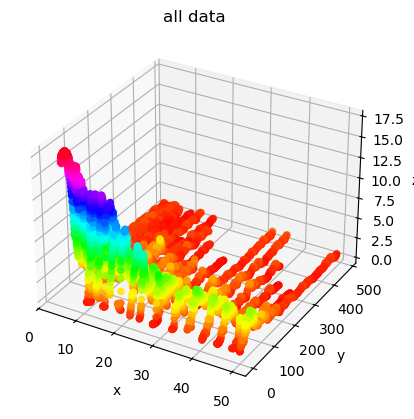

<Figure size 640x480 with 0 Axes>

In [73]:
for i in range(len(data)):
    for j in range(2, 6):
        for k in range(len(data[i][j])):
            data[i][j][k] /= sensor_baseline_avg[j-2]

x = []
y = []
z = []

for i in range(len(data)):
    A_avg = np.mean(np.array(data[i][2:5]), axis=0)
    x.extend(data[i][0])
    y.extend(data[i][1])
    z.extend(A_avg)

ax = plt.axes(projection='3d')
ax.set_title('all data')
# ax.plot_trisurf(x,y,z, cmap='hsv')
ax.scatter3D(x,y,z, '.', c=z, cmap='hsv') # viridis
ax.set_xlabel(r'x')
ax.set_ylabel(r'y')
ax.set_zlabel(r'z')
plt.show()
plt.clf()

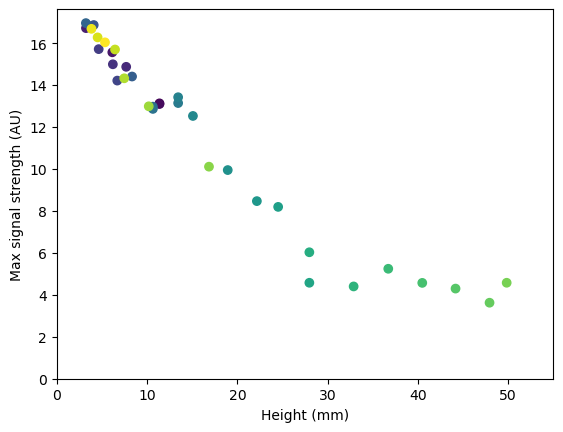

In [74]:
x = []
y = []

for i in range(len(data)):
    A_avg = np.mean(np.array(data[i][2:5]), axis=0)
    x.append(data[i][0][0])
    y.append(np.max(A_avg))

plt.scatter(x, y, c=range(5,number_of_files), cmap='viridis')
plt.xlim(0,55)
plt.ylim(bottom=0)
plt.xlabel("Height (mm)")
plt.ylabel("Max signal strength (AU)")
plt.show()